In [6]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
from TraceSimulator import TraceSimulator


def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict

config = read_yaml_to_dict('config.yaml')
ts = TraceSimulator(config)

/home/dwong/software/TraceSimulator/TraceSimulator/TraceSimulator.py:185: RuntimeWarning: overflow encountered in exp
  self.template = np.concatenate([(np.exp((xs - self.trigger_time) / self.tau_rise))[xs <= self.trigger_time], (np.exp(-(xs - self.trigger_time) / self.tau_decay))[xs > self.trigger_time]])


N_uv: [0]
N_tr: [0]
N_ir: [0]
N_ph: [10000]


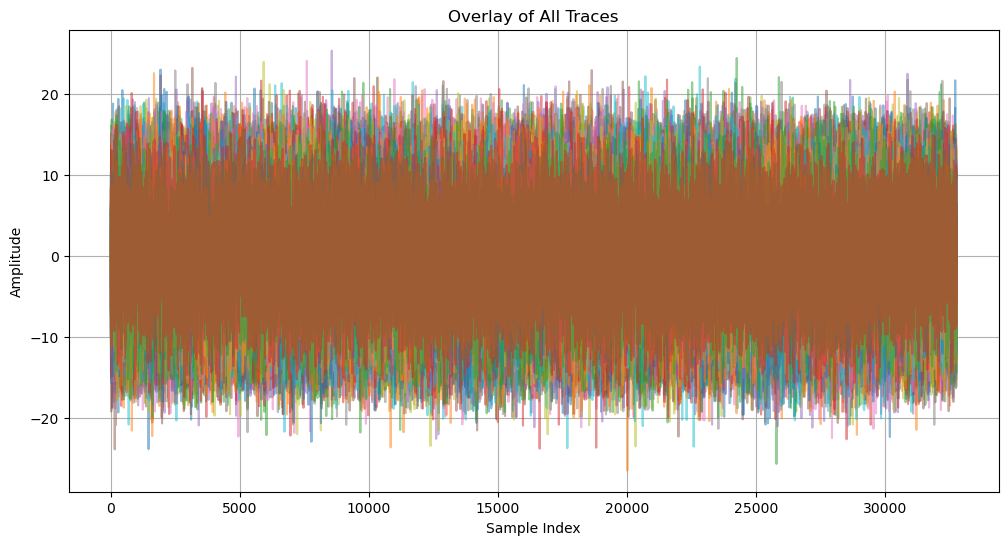

In [30]:
trace = ts.generate(E=10, x=-40, y=80, z=-1800, no_noise=False, type_recoil='NR', quantize=False) 
trace = trace.squeeze(0)
# Plot 1: Overlay of all traces
plt.figure(figsize=(12, 6))
for i in range(trace.shape[0]):
    plt.plot(trace[i], alpha=0.5)
plt.title('Overlay of All Traces')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [143]:
row_means = np.mean(trace, axis=1)


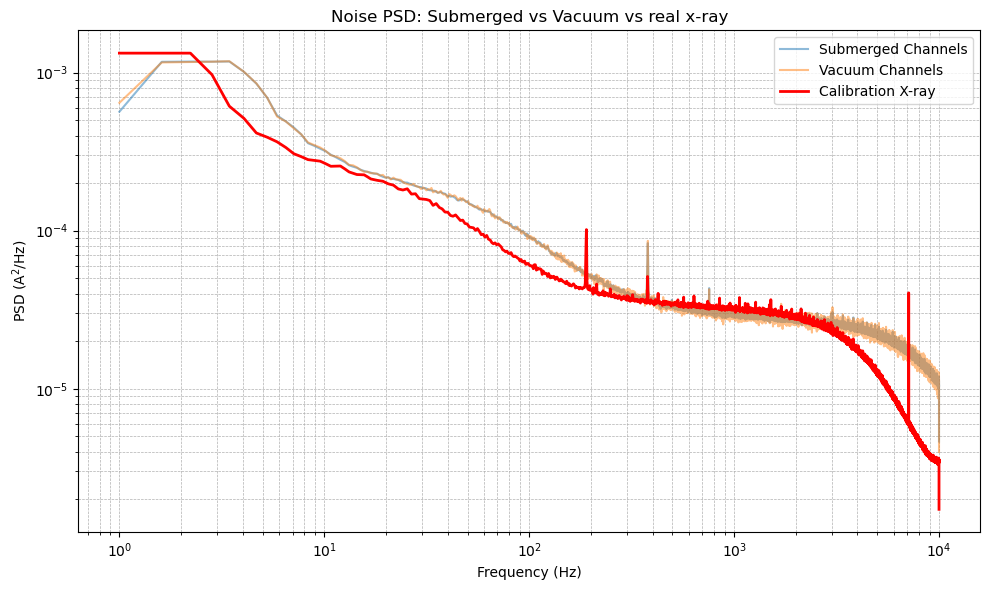

In [1]:
# Re-importing required libraries after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Load the PSD data from .npy files
psd_sub = np.load("../templates/noise_psd_submerged.npy")
psd_vac = np.load("../templates/noise_psd_vacuum.npy")
psd_mmc = np.load("../templates/noise_psd_from_MMC.npy")

# Create frequency axes assuming the same length for simplicity
f_sub = np.linspace(1, 10000, len(psd_sub))
f_vac = np.linspace(1, 10000, len(psd_vac))
f_mmc = np.linspace(1, 10000, len(psd_mmc))

# Plot all three PSDs
plt.figure(figsize=(10, 6))
plt.loglog(f_sub, psd_sub, label="Submerged Channels", alpha=0.5)
plt.loglog(f_vac, psd_vac, label="Vacuum Channels", alpha=0.5)
plt.loglog(f_mmc, psd_mmc, label="Calibration X-ray", color='red', linewidth=2)

plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (A$^2$/Hz)")
plt.legend()
plt.title("Noise PSD: Submerged vs Vacuum vs real x-ray")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


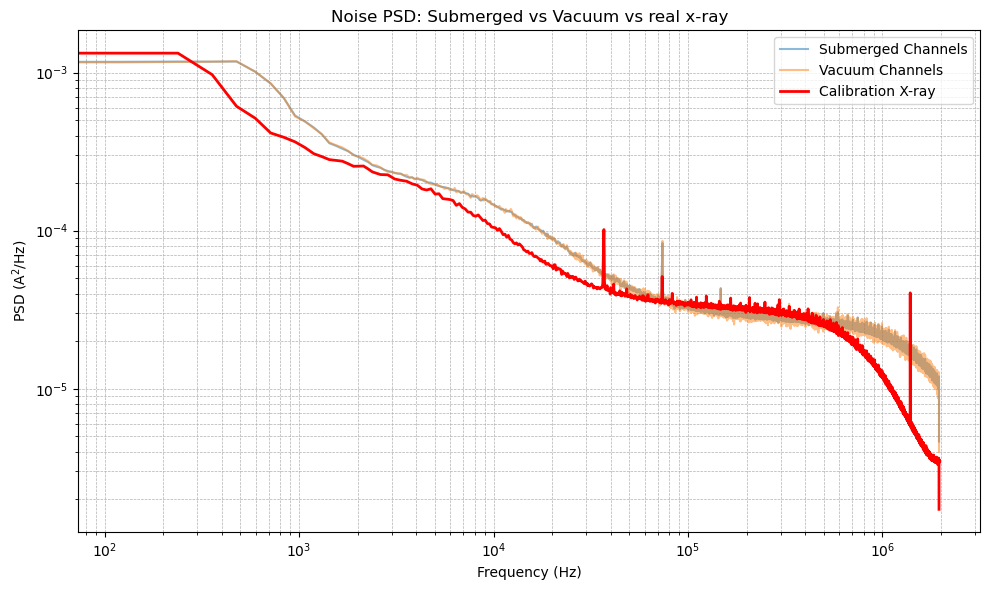

In [5]:
# Re-importing required libraries after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Load the PSD data from .npy files
psd_sub = np.load("../templates/noise_psd_submerged.npy")
psd_vac = np.load("../templates/noise_psd_vacuum.npy")
psd_mmc = np.load("../templates/noise_psd_from_MMC.npy")

# Sampling frequency in Hz
fs = 3906250

# Create frequency axes based on the sampling frequency
f_sub = np.linspace(0, fs / 2, len(psd_sub))
f_vac = np.linspace(0, fs / 2, len(psd_vac))
f_mmc = np.linspace(0, fs / 2, len(psd_mmc))

# Plot all three PSDs
plt.figure(figsize=(10, 6))
plt.loglog(f_sub, psd_sub, label="Submerged Channels", alpha=0.5)
plt.loglog(f_vac, psd_vac, label="Vacuum Channels", alpha=0.5)
plt.loglog(f_mmc, psd_mmc, label="Calibration X-ray", color='red', linewidth=2)

plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (A$^2$/Hz)")
plt.legend()
plt.title("Noise PSD: Submerged vs Vacuum vs real x-ray")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
